## READ
This notebook looks at the same spinup time, but with different validation data, i.e., the one with higher depth resolution and a slightly higher temporal coverage. This data was taken in 2016.

In [1]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [3]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [4]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

This notebook looks at the performance of the thermal model over a long period of time, to see how long it takes to get rid of initial conditions for different soil layers.

In [9]:
# define layers with data
layers = [
    '0.00', '0.25', '0.50',
    '1.00', '1.25', '1.50', '1.75',
    '2.00', '2.25', '2.50', '2.75',
    '3.00', '3.25', '3.50', '3.75',
    '4.00', '4.25',
    ]  # [m] depths at which ground temperature is written seperately to csv file

First load in model results.

In [10]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid1 = 'val_gt14'
runid2 = 'val_gt15'

fname_gt1 = runid1 + "_ground_temperature_timeseries.csv"
fname_gt1 = runid2 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt1 = pd.read_csv(fname_gt1, parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt1, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = [f'temp_{layer}m[K]' for layer in layers], 

print(colnames)

for colname in colnames:
    
    df_gt1[f'{colname[:-3]}[C]'] = df_gt1[colname] - 273.15
    df_gt2[f'{colname[:-3]}[C]'] = df_gt2[colname] - 273.15

df_gt1.head()

(['temp_0.00m[K]', 'temp_0.25m[K]', 'temp_0.50m[K]', 'temp_0.75m[K]', 'temp_1.00m[K]', 'temp_1.25m[K]', 'temp_1.50m[K]', 'temp_1.75m[K]', 'temp_2.00m[K]', 'temp_2.25m[K]', 'temp_2.50m[K]', 'temp_2.75m[K]', 'temp_2.95m[K]', 'temp_3.00m[K]', 'temp_3.25m[K]', 'temp_3.50m[K]', 'temp_3.75m[K]', 'temp_4.00m[K]', 'temp_4.25m[K]', 'temp_4.50m[K]', 'temp_4.75m[K]'],)


KeyError: "['temp_0.00m[K]', 'temp_0.25m[K]', 'temp_0.50m[K]', 'temp_0.75m[K]', 'temp_1.00m[K]', 'temp_1.25m[K]', 'temp_1.50m[K]', 'temp_1.75m[K]', 'temp_2.00m[K]', 'temp_2.25m[K]', 'temp_2.50m[K]', 'temp_2.75m[K]', 'temp_3.00m[K]', 'temp_3.25m[K]', 'temp_3.50m[K]', 'temp_3.75m[K]', 'temp_4.00m[K]', 'temp_4.25m[K]', 'temp_4.50m[K]', 'temp_4.75m[K]'] not in index"

In [11]:
print(df_gt1.time)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
87595   2011-12-31 19:00:00
87596   2011-12-31 20:00:00
87597   2011-12-31 21:00:00
87598   2011-12-31 22:00:00
87599   2011-12-31 23:00:00
Name: time, Length: 87600, dtype: datetime64[ns]


Load in data.

In [12]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson2\Temp_arrays USGS-UCSC_Oberle\BI_T-1_processed.csv")), 
    parse_dates=['date_time'],
    )

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,date_time,dpth0cm,dpth25cm,dpth50cm,dpth100cm,dpth125cm,dpth150cm,dpth175cm,dpth200cm,dpth225cm,dpth250cm,dpth275cm,dpth300cm,dpth325cm,dpth350cm,dpth375cm,dpth400cm,dpth425cm
0,2016-05-31 18:28:21,-1.82300,-2.49850,-3.27075,-3.70675,-4.36265,-4.8558,-5.12305,-5.50035,-5.5635,-5.88745,-6.27345,-7.4496,-8.20100,-8.53805,-8.51100,-8.21095,-8.03485
1,2016-05-31 19:28:21,-1.83305,-2.50855,-3.27075,-3.70925,-4.36770,-4.8558,-5.12560,-5.50535,-5.5610,-5.90000,-6.26345,-7.4446,-8.20855,-8.53805,-8.50845,-8.21095,-8.02230
2,2016-05-31 20:28:21,-1.84810,-2.52115,-3.25570,-3.71930,-4.37020,-4.8558,-5.12055,-5.49280,-5.5560,-5.89495,-6.25090,-7.4421,-8.20350,-8.53555,-8.51350,-8.21095,-8.02980
3,2016-05-31 21:28:21,-1.85310,-2.52615,-3.25825,-3.72940,-4.36520,-4.8558,-5.11555,-5.49030,-5.5560,-5.88995,-6.25590,-7.4421,-8.21105,-8.53805,-8.51850,-8.20595,-8.02230
4,2016-05-31 22:28:21,-1.87070,-2.52870,-3.24820,-3.72435,-4.36770,-4.8558,-5.12055,-5.49785,-5.5535,-5.89495,-6.26095,-7.4421,-8.20100,-8.53555,-8.51600,-8.20845,-8.03485


,date_time,dpth0cm,dpth25cm,dpth50cm,dpth100cm,dpth125cm,dpth150cm,dpth175cm,dpth200cm,dpth225cm,dpth250cm,dpth275cm,dpth300cm,dpth325cm,dpth350cm,dpth375cm,dpth400cm,dpth425cm
2169,2016-09-13 23:28:20,0.1155,-0.15535,-0.64515,-1.00155,-1.4647,-1.8023,-2.02965,-2.32815,-2.35305,-2.63635,-2.95805,-4.08390,-5.13775,-5.97495,-6.70170,-7.32850,-7.80645
2170,2016-09-14 21:28:26,0.0000,-0.21315,-0.64515,-0.99400,-1.4647,-1.7898,-2.03220,-2.34575,-2.35305,-2.63635,-2.96805,-4.06135,-5.13025,-5.97245,-6.73440,-7.33100,-7.79890
2171,2016-09-14 21:28:57,0.0000,-0.16540,-0.64515,-0.99905,-1.4647,-1.7973,-2.03220,-2.31815,-2.35055,-2.62130,-2.93545,-4.06385,-5.13025,-5.97245,-6.68665,-7.30335,-7.79890
2172,2016-09-14 22:28:20,-0.0025,-0.16040,-0.64515,-0.99400,-1.4647,-1.7948,-2.02965,-2.33070,-2.35305,-2.63635,-2.93295,-4.06385,-5.13275,-5.97245,-6.67910,-7.31595,-7.79890
2173,2016-09-14 23:28:20,-0.0025,-0.16040,-0.64515,-0.99400,-1.4647,-1.7948,-2.03220,-2.31815,-2.34555,-2.63130,-2.92795,-4.06135,-5.13025,-5.97245,-6.69165,-7.30590,-7.79890


Choose study site.

In [29]:
erikson_columns = df_erikson.columns[1:]

print(erikson_columns)

Index(['dpth0cm', 'dpth25cm', 'dpth50cm', 'dpth100cm', 'dpth125cm',
       'dpth150cm', 'dpth175cm', 'dpth200cm', 'dpth225cm', 'dpth250cm',
       'dpth275cm', 'dpth300cm', 'dpth325cm', 'dpth350cm', 'dpth375cm',
       'dpth400cm', 'dpth425cm'],
      dtype='object')


Let's plot all model results in one large plot.

Text(0.5, 1.0, 'Temperature measured at BI_T-1 by Erikson et al')

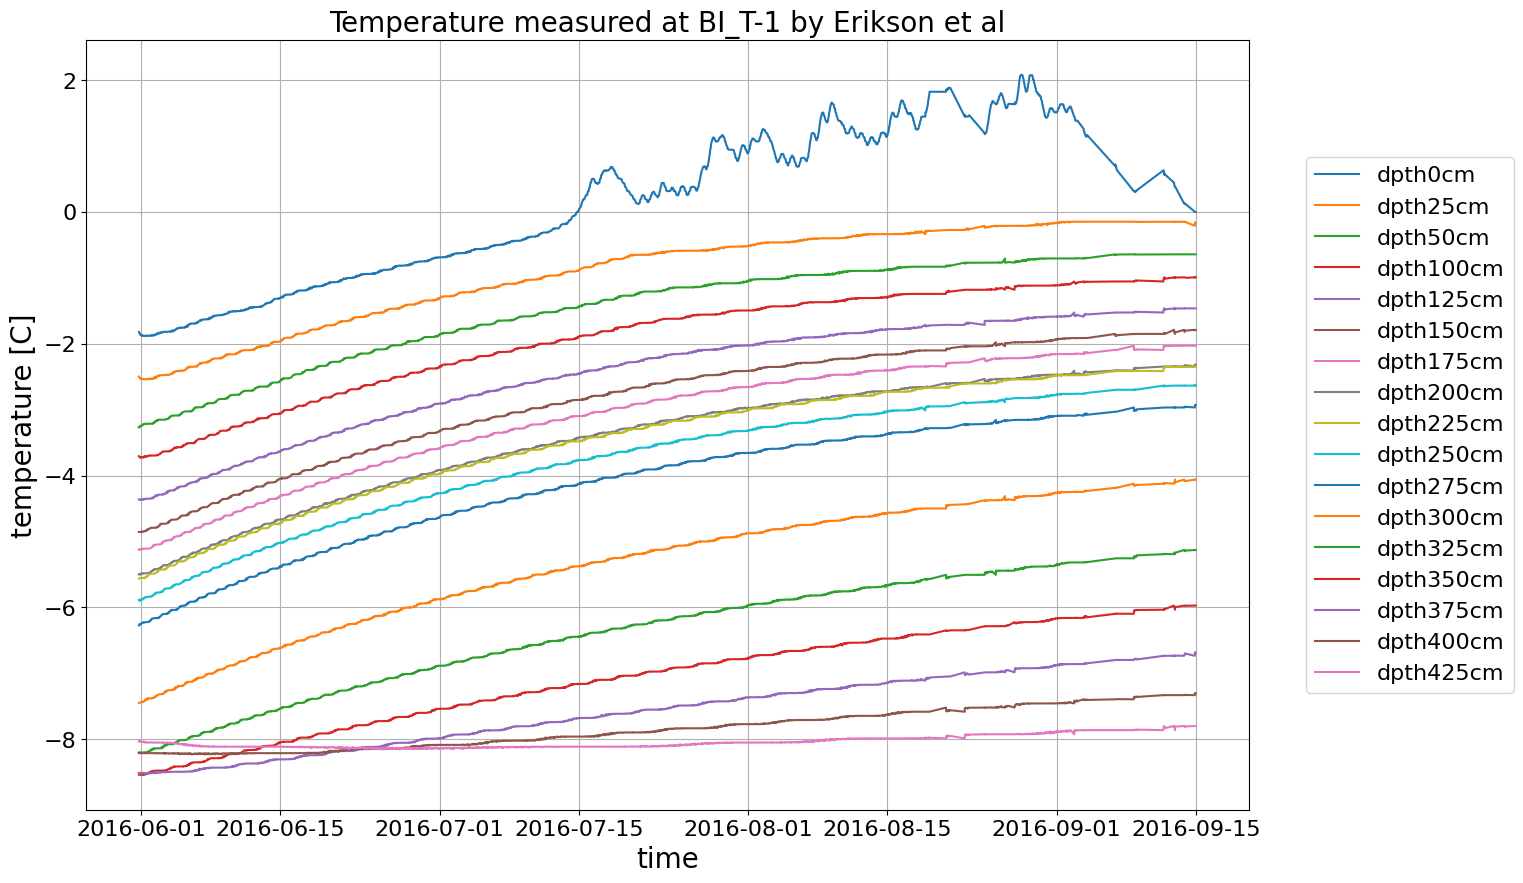

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))

for i, colname in enumerate(erikson_columns):
    
    ax.plot(df_erikson.date_time, df_erikson[erikson_columns[i]], label=erikson_columns[i])
    
ax.set_xlabel('time')
ax.set_ylabel('temperature [C]')

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_title('Temperature measured at BI_T-1 by Erikson et al')

And now each erikson layer with corresponding modelling layer.

In [39]:
model_layers = []

for colname in df_gt1.columns:
    
    if '[C]' in str(colname) and np.float32(colname[5:-4]) in layers:
        
        model_layers.append(colname)
        
print(model_layers)

[]


Let's define a function that converts datetime to hour of year, and adds a number corresponding to the number of the iteration.

In [46]:
def time_to_index(date_array, iteration=0):
    
    # print(pd.to_datetime(df_erikson.time).dt.dayofyear.shape)
    # print(pd.to_datetime(df_erikson.time).dt.hour.shape)
    
    return (pd.to_datetime(date_array).dayofyear * 24 + pd.to_datetime(date_array).hour).values + iteration * 8760
    
(time_to_index(df_erikson.date_time.values, 9)).shape
(time_to_index(df_erikson.date_time.values, 10)).shape

(2174,)

In [53]:
print(len(erikson_columns))

17


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_11732\2119755585.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


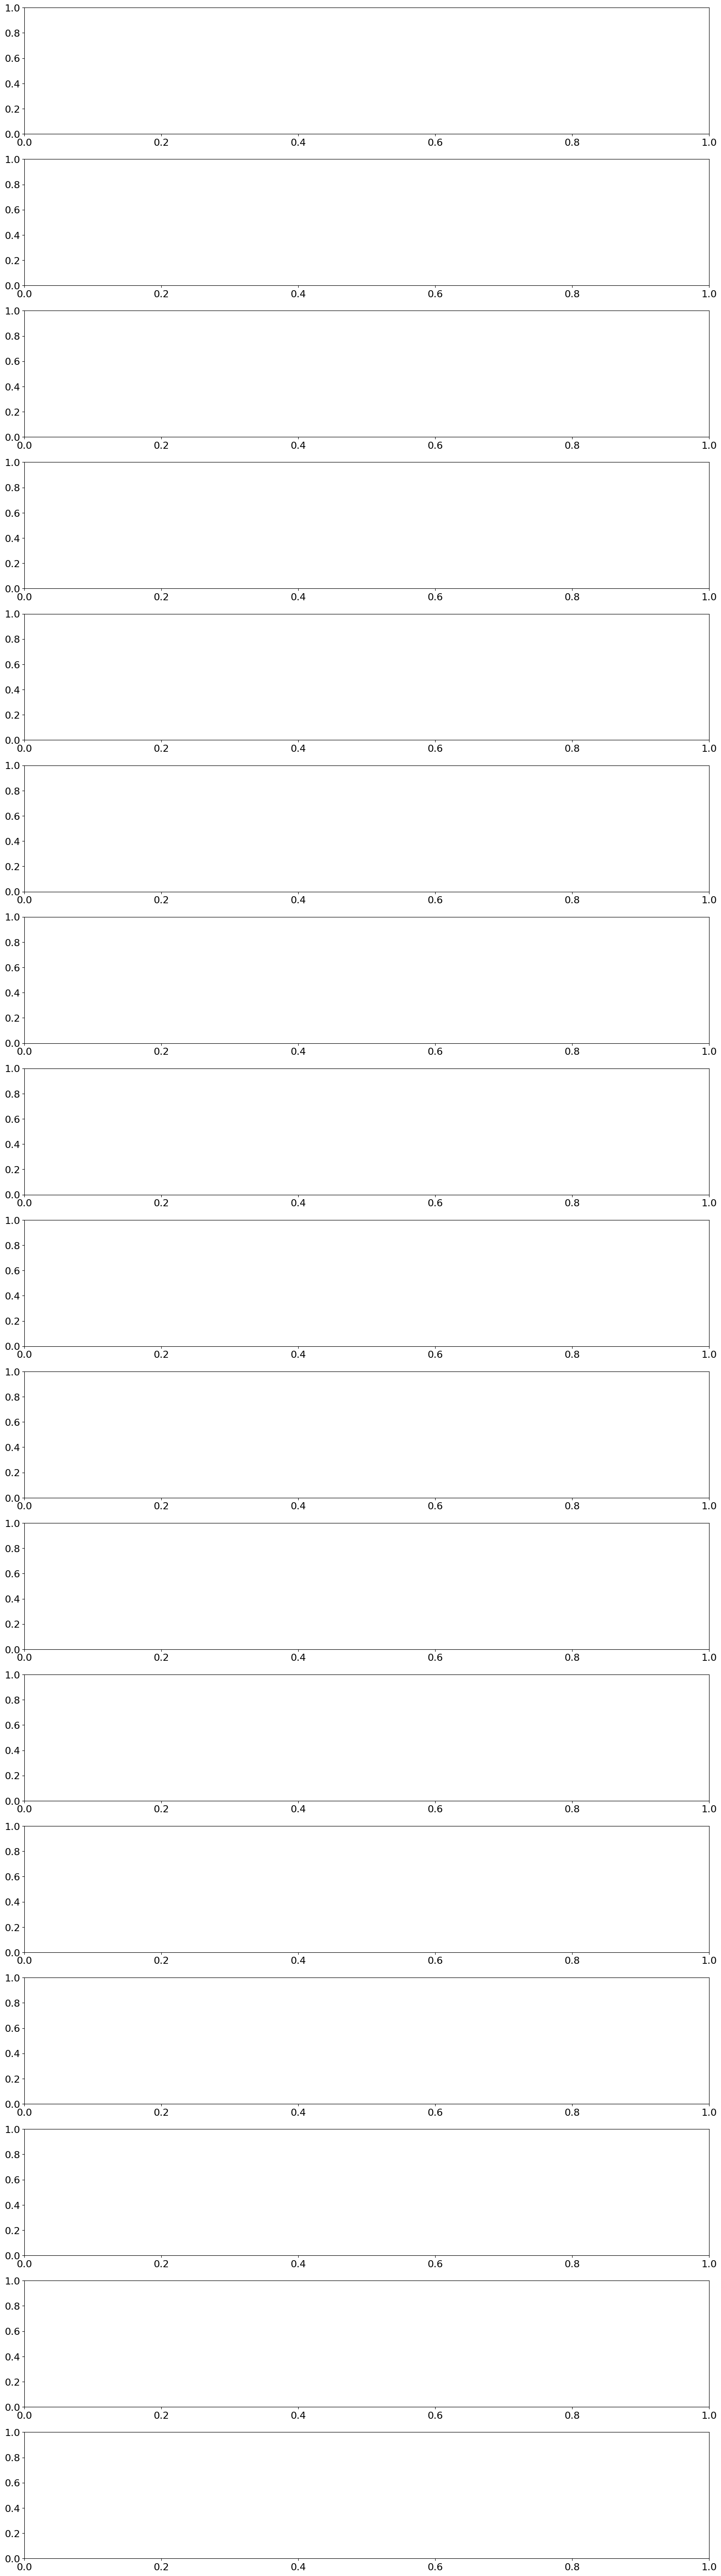

In [57]:
fig, ax = plt.subplots(len(erikson_columns), figsize=(20, 75))

for i, erikson_colname, model_colname in zip(np.arange(len(erikson_columns)), erikson_columns, model_layers):
    
    ax[i].plot(time_to_index(df_erikson.date_time, 9), df_erikson[erikson_colname], label=erikson_colname, color='k')
    
    ax[i].plot(df_gt1.index, df_gt1[model_colname], label=f'{model_colname} ({runid1})', color='C0') 
    ax[i].plot(df_gt2.index, df_gt2[model_colname], label=f'{model_colname} ({runid2})', color='C1')
    
    ax[i].grid()
    ax[i].legend(loc='lower right')
    ax[i].set_xlabel('time')
    ax[i].set_ylabel('temperature [C]')
    ax[i].set_title(f'{erikson_colname}')
    
fig.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_15056\2955523426.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


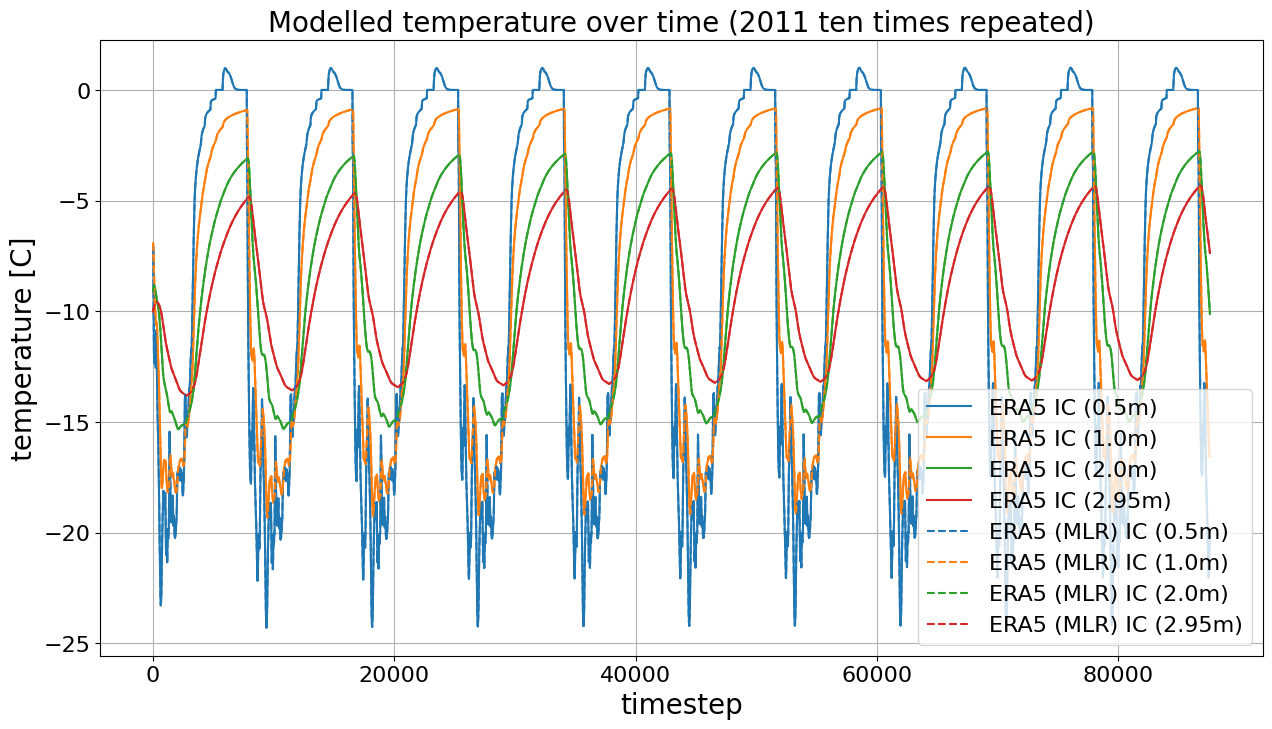

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df_gt1.index, df_gt1['temp_0.5m[C]'].values, color='C0', label=f'ERA5 IC (0.5m)')
ax.plot(df_gt1.index, df_gt1['temp_1.0m[C]'].values, color='C1', label=f'ERA5 IC (1.0m)')
ax.plot(df_gt1.index, df_gt1['temp_2.0m[C]'].values, color='C2', label=f'ERA5 IC (2.0m)')
ax.plot(df_gt1.index, df_gt1['temp_2.95m[C]'].values, color='C3', label=f'ERA5 IC (2.95m)')

ax.plot(df_gt2.index, df_gt2['temp_0.5m[C]'].values, '--', color='C0', label=f'ERA5 (MLR) IC (0.5m)')
ax.plot(df_gt2.index, df_gt2['temp_1.0m[C]'].values, '--', color='C1', label=f'ERA5 (MLR) IC (1.0m)')
ax.plot(df_gt2.index, df_gt2['temp_2.0m[C]'].values, '--', color='C2', label=f'ERA5 (MLR) IC (2.0m)')
ax.plot(df_gt2.index, df_gt2['temp_2.95m[C]'].values, '--', color='C3', label=f'ERA5 (MLR) IC (2.95m)')

ax.grid()
ax.legend()

ax.set_title("Modelled temperature over time (2011 ten times repeated)")
ax.set_ylabel('temperature [C]')
ax.set_xlabel('timestep')

# ax.set_ylim((-10, 0))

fig.show()

fig.savefig(os.path.join(save_path, 'spin_up.png'), bbox_inches='tight', facecolor='white', transparent=False)

(1940,)

And now each one individually, each year layered over eachother

In [30]:
df_gt = [df_gt1, df_gt2][0]

In [31]:
N = len(df_gt1)
years = np.arange(10)

N_year = int(N / len(years))

model_temp_050 = df_gt['temp_0.5m[C]'].values.reshape((len(years), N_year))
model_temp_100 = df_gt['temp_1.0m[C]'].values.reshape((len(years), N_year))
model_temp_200 = df_gt['temp_2.0m[C]'].values.reshape((len(years), N_year))
model_temp_295 = df_gt['temp_2.95m[C]'].values.reshape((len(years), N_year))

print(model_temp_050.shape)

(10, 8760)


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_15056\1818593750.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


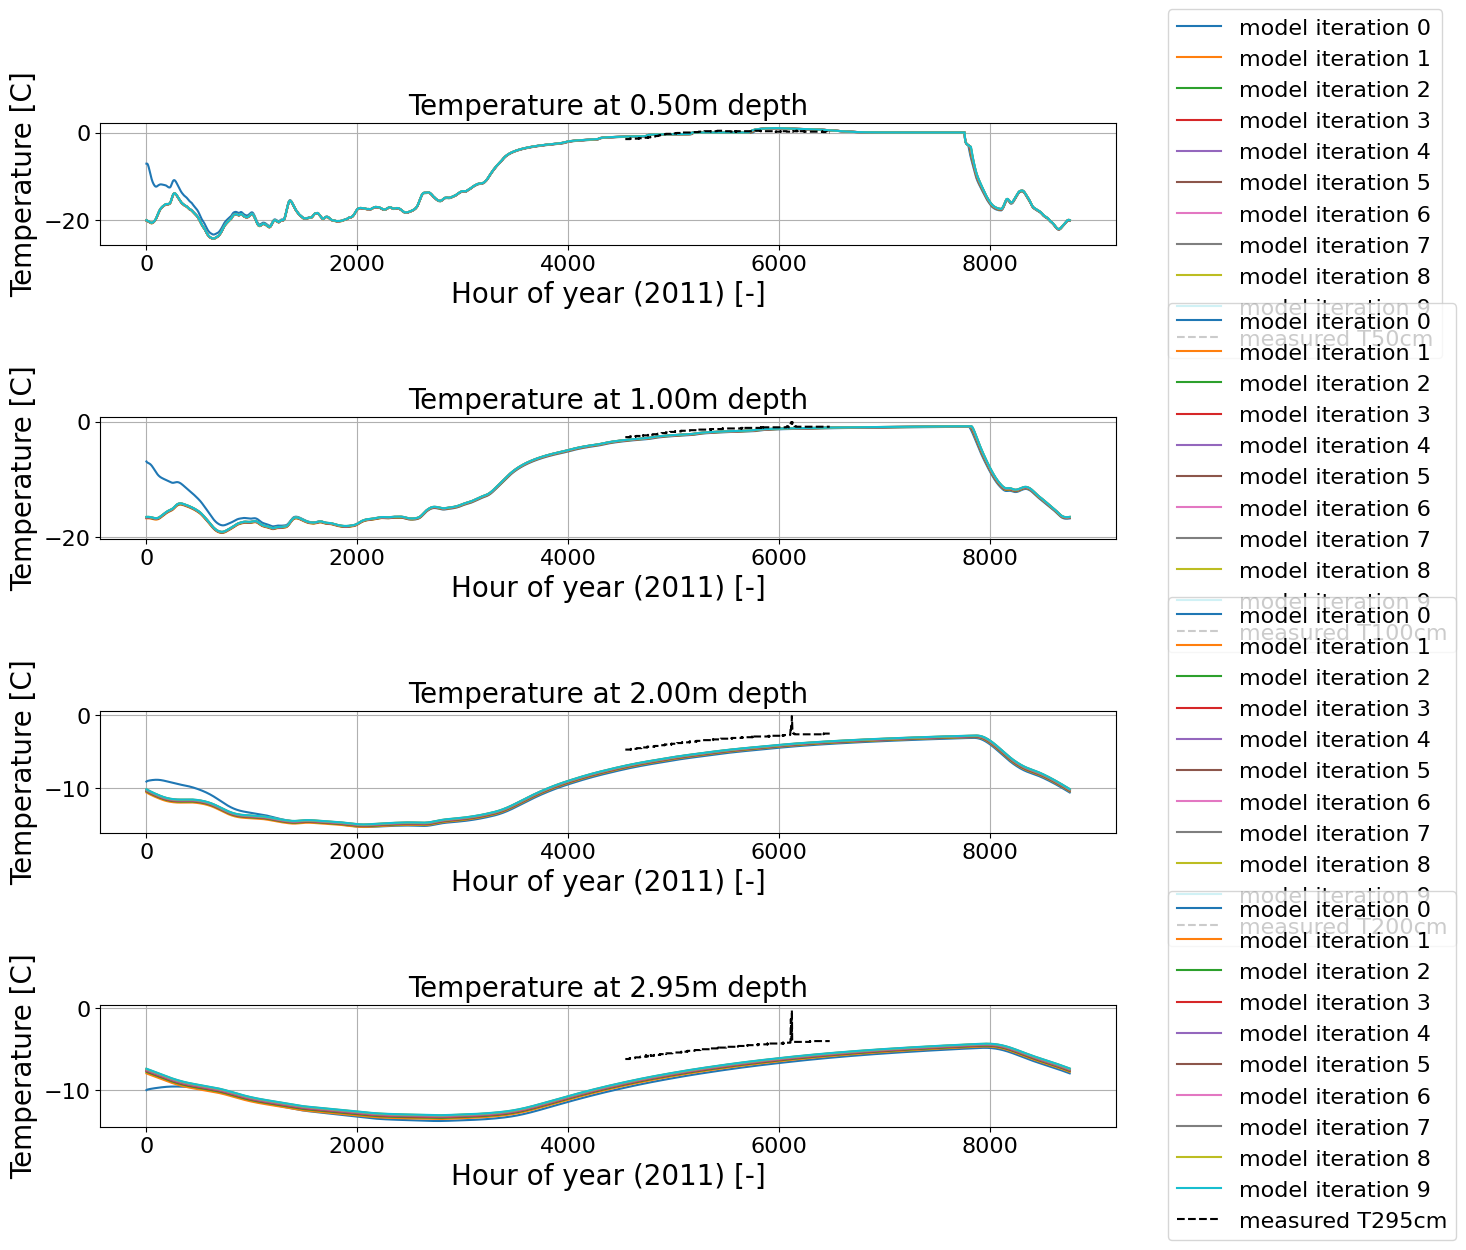

In [32]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# loop through different depths
for i, model_temp in enumerate([model_temp_050, model_temp_100, model_temp_200, model_temp_295]):
    
    # loop through different years
    for it, row in enumerate(model_temp):
        
        axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}')
        # axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}', alpha=0.5)

    # also plot measured data
    col = erikson_columns[i]
    axs[i].plot(time_to_index(df_erikson.time), df_erikson[col], "k--", label=f"measured {col}")
    
    # and give the plot some attributes
    axs[i].grid()
    axs[i].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    axs[i].set_xlabel('Hour of year (2011) [-]')
    axs[i].set_ylabel('Temperature [C]')
    axs[i].set_title(f'Temperature at {[0.5, 1.0, 2.0, 2.95][i]:.2f}m depth')
    
        
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Surface temperature over time (2011 ten times repeated)')

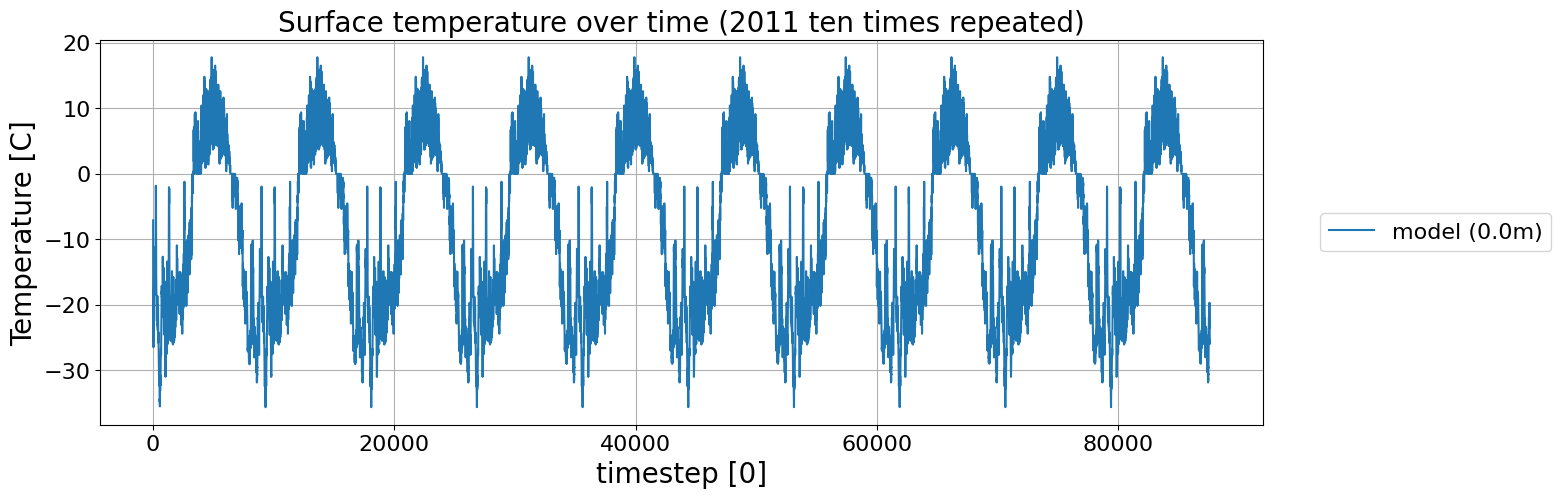

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt.index, df_gt['temp_0m[C]'], label="model (0.0m)")

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
ax.set_xlabel('timestep [0]')
ax.set_ylabel('Temperature [C]')
ax.set_title("Surface temperature over time (2011 ten times repeated)")

